In [27]:
import pandas as pd
import numpy as np
import math

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
import matplotlib as mp
from tensorflow.keras import Model
%matplotlib inline
!conda info


     active environment : base
    active env location : C:\Users\19176\anaconda3
       user config file : C:\Users\19176\.condarc
 populated config files : C:\Users\19176\.condarc
          conda version : 4.11.0
    conda-build version : 3.21.6
         python version : 3.9.7.final.0
       virtual packages : __win=0=0
                          __archspec=1=x86_64
       base environment : C:\Users\19176\anaconda3  (writable)
      conda av data dir : C:\Users\19176\anaconda3\etc\conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.anaconda.com/pkgs/msys2/noarch
          package cache : C:\Users\19176\anaconda3\pkgs
        

In [5]:
data = pd.read_csv("1-s2.0-S0264127518308682-mmc1 (3).csv")

In [6]:
### cleaning the data
data.isnull().sum()/len(data)

No.       0.0
C         0.0
Si        0.0
Mn        0.0
P         0.0
S         0.0
Cr        0.0
Ni        0.0
Mo        0.0
N         0.0
Nb        0.0
Co        0.0
Cu        0.0
Al        0.0
Ti        0.0
V         0.0
B         0.0
Th        0.0
I         0.0
U         0.0
Ve        0.0
Strain    0.0
TCL       0.0
dtype: float64

In [7]:
data.head()

,No.,C,Si,Mn,P,S,Cr,Ni,Mo,N,...,Al,Ti,V,B,Th,I,U,Ve,Strain,TCL
0,1,0.010,0.48,1.61,0.024,0.019,17.33,10.62,2.09,0.060,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.5
1,2,0.011,0.58,1.06,0.032,0.013,16.95,10.50,2.15,0.078,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.1
2,3,0.010,0.46,1.09,0.021,0.001,17.40,11.50,2.88,0.105,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,0.9
3,4,0.010,0.51,1.60,0.021,0.001,17.55,12.95,2.76,0.113,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,3.7
4,5,0.012,0.46,1.54,0.027,0.023,16.28,10.15,2.06,0.098,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.5


In [16]:
subdata = data.loc[:, 'C':'TCL']
subdata.head()

,C,Si,Mn,P,S,Cr,Ni,Mo,N,Nb,...,Al,Ti,V,B,Th,I,U,Ve,Strain,TCL
0,0.010,0.48,1.61,0.024,0.019,17.33,10.62,2.09,0.060,0.0,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.5
1,0.011,0.58,1.06,0.032,0.013,16.95,10.50,2.15,0.078,0.0,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.1
2,0.010,0.46,1.09,0.021,0.001,17.40,11.50,2.88,0.105,0.0,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,0.9
3,0.010,0.51,1.60,0.021,0.001,17.55,12.95,2.76,0.113,0.0,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,3.7
4,0.012,0.46,1.54,0.027,0.023,16.28,10.15,2.06,0.098,0.0,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.5


In [17]:
subdata.isnull().sum()/len(subdata)

C         0.0
Si        0.0
Mn        0.0
P         0.0
S         0.0
Cr        0.0
Ni        0.0
Mo        0.0
N         0.0
Nb        0.0
Co        0.0
Cu        0.0
Al        0.0
Ti        0.0
V         0.0
B         0.0
Th        0.0
I         0.0
U         0.0
Ve        0.0
Strain    0.0
TCL       0.0
dtype: float64

In [25]:
#linear regression
import numpy as np
from sklearn.linear_model import LinearRegression
X = subdata.iloc[:, 0:19].values
y = subdata.iloc[:, 19].values
X, y = X.astype('float'), y.astype('float')
n_features = X.shape[1]
model = LinearRegression().fit(X, y)
r_sq = model.score(X, y)

print('coefficient of determination:', r_sq)

coefficient of determination: 0.7937524577568617


In [72]:
reg.coef_

array([-1.03096215e+00,  4.72438936e-01, -2.12705215e-01,  4.22999927e+00,
        8.02407628e+00, -8.15672631e-02,  2.04864643e-02,  2.70597194e-02,
        1.76489020e+00,  3.80591993e-01,  3.23531459e+00, -9.04127434e-02,
       -9.83680584e-01, -3.03566850e-01,  1.78711507e+00, -5.28389553e+01,
       -5.31083314e-01,  1.61842386e-02,  3.44924021e-02])

In [73]:
reg.intercept_

3.9989118949626183

In [46]:
#### clustering
%matplotlib inline
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from scipy.special import gamma
import seaborn as sns; sns.set()

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 32,
    'figure.figsize': (9,6)
})

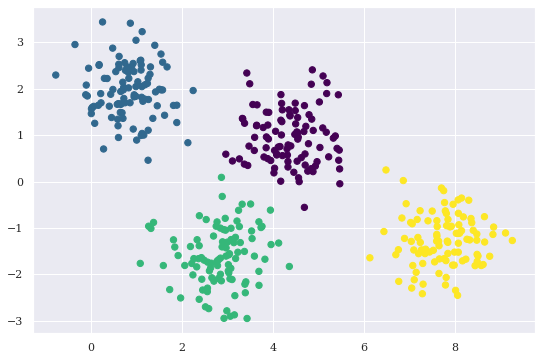

In [47]:
# Generate some data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting
plt.scatter(X[:, 0], X[:, 1], c=y_true, s = 40, cmap='viridis');

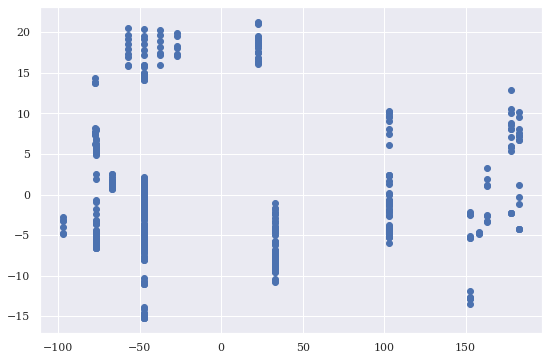

In [48]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(subdata)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2']);

In [49]:
pca = PCA(0.95)
pca.fit_transform(subdata)


(pca.explained_variance_ratio_)*100


array([98.42556097])

In [50]:
print(pca.singular_values_)

[1802.73942823]


Wall time: 1.53 s


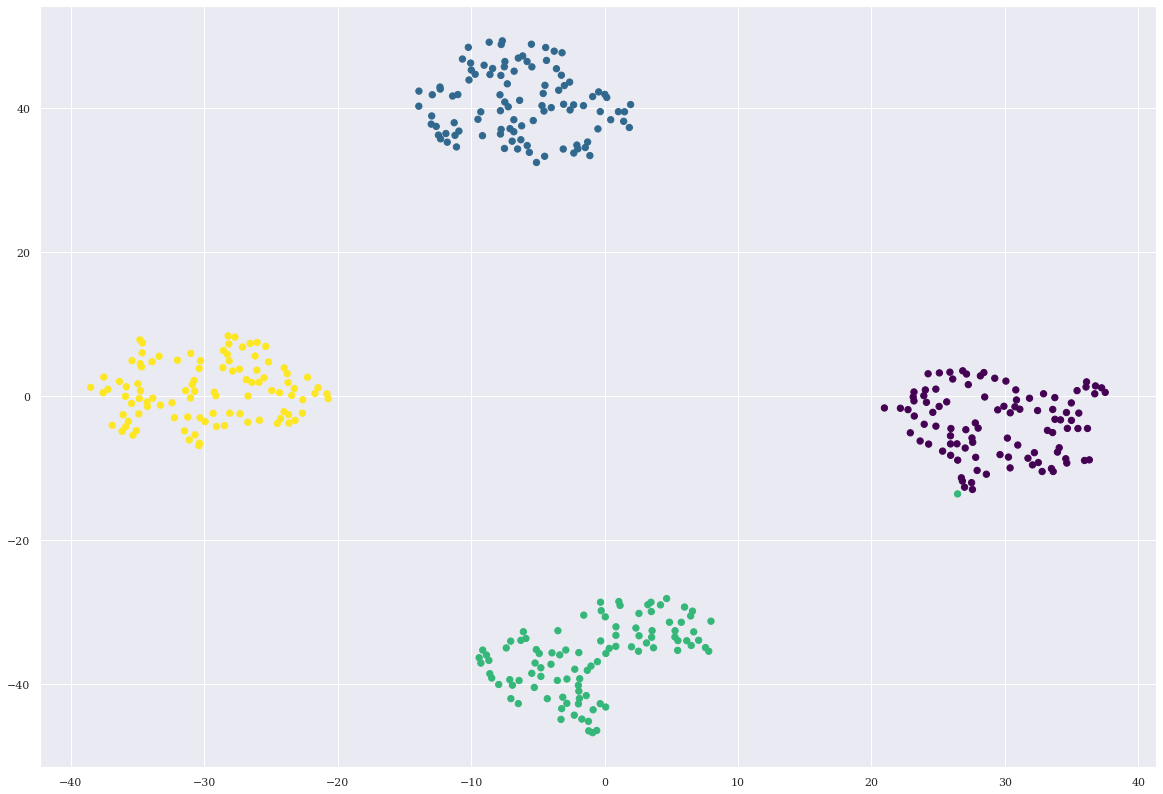

In [51]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=20, n_iter=1000, metric='euclidean', init='random', 
            method='barnes_hut',n_jobs=-1)
%time X_embedded = tsne.fit_transform(X)

plt.figure(figsize=(20, 14))  
plt.scatter(X_embedded[:,0], X_embedded[:,1], c = y_true, s = 40, cmap='viridis');

Wall time: 11.1 s


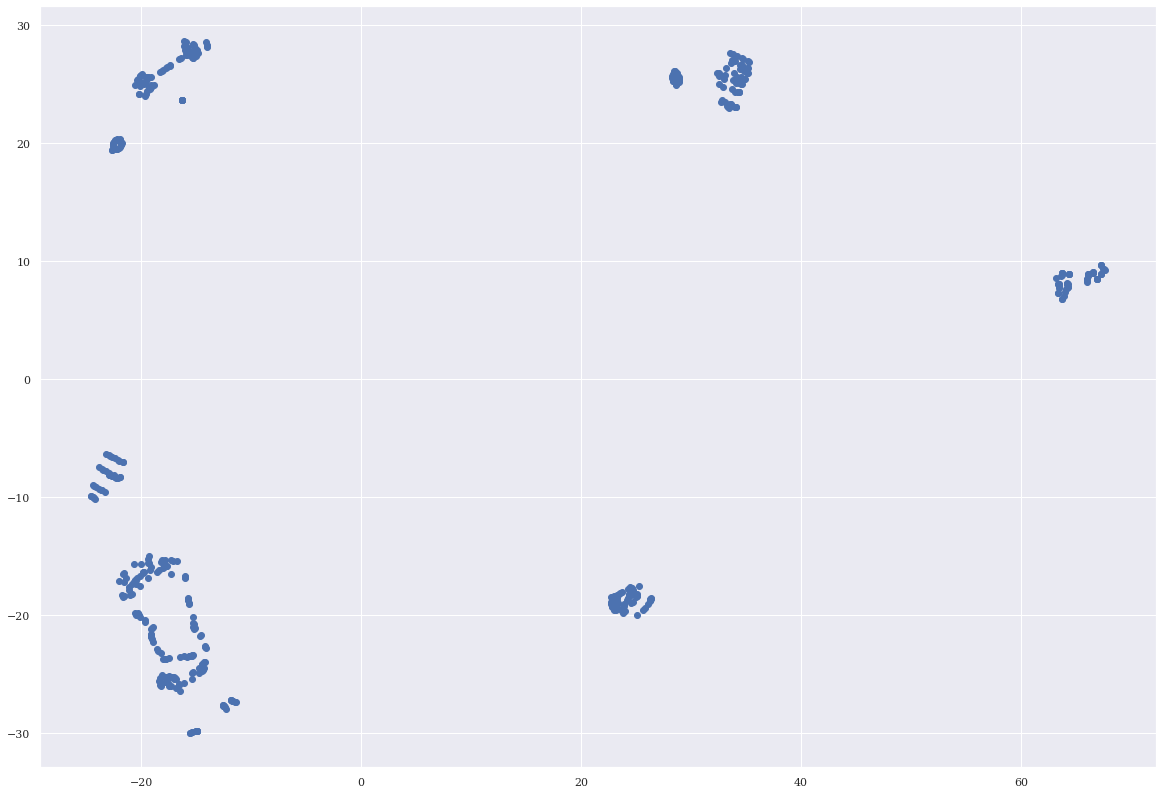

In [52]:
tsne = TSNE(n_components=2, perplexity=40,n_iter=5000,metric='euclidean',init='random',
    method='barnes_hut',n_jobs=-1)
%time X_embedded = tsne.fit_transform(subdata)

plt.figure(figsize=(20, 14))  
plt.scatter(X_embedded[:,0], X_embedded[:,1]);

In [38]:
### neural network 
X = subdata.iloc[:, 0:19].values
y = subdata.iloc[:, 19].values
X, y = X.astype('float'), y.astype('float')
n_features = X.shape[1]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [39]:
# define the keras model
#  note the added import, see https://keras.io/about/
from tensorflow.keras.models import Sequential
model = Sequential()
#model = tf.keras.Sequential()
#  note the added import, see https://keras.io/about/
from tensorflow.keras.layers import Dense
model.add(Dense(20, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))

In [40]:
# functions to calculate score for both datasets
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def mean_absolute_error(x,y): return math.sqrt((abs(x-y)).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_test), y_test),
                m.score(X_train, y_train), m.score(X_test, y_test)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [41]:
# compile the keras model
model.compile(loss='mse', optimizer='adam')

In [42]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
11/11 [==============================] - 1s 4ms/step - loss: 2004.3163
Epoch 2/150
11/11 [==============================] - 0s 3ms/step - loss: 837.1708
Epoch 3/150
11/11 [==============================] - 0s 4ms/step - loss: 256.4575
Epoch 4/150
11/11 [==============================] - 0s 4ms/step - loss: 60.2628
Epoch 5/150
11/11 [==============================] - 0s 3ms/step - loss: 15.4231
Epoch 6/150
11/11 [==============================] - 0s 3ms/step - loss: 9.8878
Epoch 7/150
11/11 [==============================] - 0s 3ms/step - loss: 10.4114
Epoch 8/150
11/11 [==============================] - 0s 3ms/step - loss: 10.0637
Epoch 9/150
11/11 [==============================] - 0s 3ms/step - loss: 9.4926
Epoch 10/150
11/11 [==============================] - 0s 3ms/step - loss: 9.2626
Epoch 11/150
11/11 [==============================] - 0s 3ms/step - loss: 9.2117
Epoch 12/150
11/11 [==============================] - 0s 3ms/step - loss: 9.1546
Epoch 13/150
11/11 [======

11/11 [==============================] - 0s 2ms/step - loss: 4.4863
Epoch 103/150
11/11 [==============================] - 0s 2ms/step - loss: 4.4296
Epoch 104/150
11/11 [==============================] - 0s 2ms/step - loss: 4.4006
Epoch 105/150
11/11 [==============================] - 0s 2ms/step - loss: 4.3584
Epoch 106/150
11/11 [==============================] - 0s 2ms/step - loss: 4.3393
Epoch 107/150
11/11 [==============================] - 0s 2ms/step - loss: 4.3149
Epoch 108/150
11/11 [==============================] - 0s 2ms/step - loss: 4.2657
Epoch 109/150
11/11 [==============================] - 0s 3ms/step - loss: 4.2415
Epoch 110/150
11/11 [==============================] - 0s 2ms/step - loss: 4.2099
Epoch 111/150
11/11 [==============================] - 0s 3ms/step - loss: 4.1682
Epoch 112/150
11/11 [==============================] - 0s 3ms/step - loss: 4.1352
Epoch 113/150
11/11 [==============================] - 0s 3ms/step - loss: 4.1152
Epoch 114/150
11/11 [=========

In [43]:
#evaluate on test set
yhat = model.predict(X_test)
error = mean_absolute_error(y_test, yhat)
sizeXtest = np.size(X_test)
sizeXtrain = np.size(X_train)
sizeytrain = np.size(y_train)
sizeytest = np.size(y_test)
size_yhat = np.size(yhat)
print('sizes of sizeXtrain, X_test, y_test, yhat ',sizeXtrain, sizeXtest, sizeytrain, sizeytest, size_yhat)
print('X_test.shape ... ', X_test.shape)
print('MAE: %.3f' % error)

sizes of sizeXtrain, X_test, y_test, yhat  6194 3059 326 161 161
X_test.shape ...  (161, 19)
MAE: 1.104


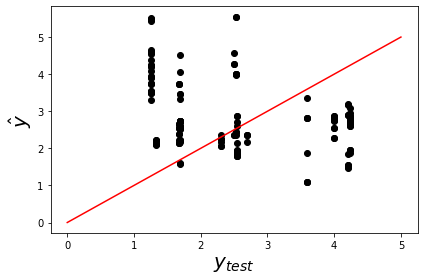

In [44]:
from matplotlib import pyplot as plt
plt.subplots_adjust( left = 0.16, bottom = 0.15 , top = 0.85 )
plt.scatter( y_test, yhat, color='black')
plt.xlabel("$y_{test}$",fontsize = 20, weight = 'bold')
plt.ylabel("$\hat{y}$",fontsize = 20, weight = 'bold')
xx = [0,5]
yy = [0,5]
plt.plot( xx, yy, color="red")
#plt.set_xlabel= 'y_test'
#plt.set_ylabel= 'yhat'
plt.tight_layout()
plt.savefig('Plot-compare-data-vs-fitted.png', dpi=600)